# Loan Analysis Case Study:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pwd

'C:\\Users\\somas\\Desktop\\UpGrad_EDA'

In [3]:
Loan = pd.read_csv("loan.csv")

C:\Users\somas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data representation

In [4]:
#Loan.dtypes
Loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
Loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#Loan.dtypes
Loan.shape

(39717, 111)

# Data cleaning

In [8]:
#Sum of missing values in each column
Loan.isnull().sum(axis=0)

#Percentage of missing values in each column
round(Loan.isnull().sum(axis=0)/len(Loan.index),1)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                          10.0
emp_length                          0.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               30.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [9]:
#Removing columns having more than 80% of null values
Removing_columns = Loan.columns[(Loan.isnull().sum()/len(Loan.index))*100 > 50]
print(Removing_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [10]:
Loan =Loan.dropna(axis=1)
Loan.shape

(39717, 43)

In [11]:
(Loan.isnull().sum(axis=0)/len(Loan.index),1)*100

(id                         0.0
 member_id                  0.0
 loan_amnt                  0.0
 funded_amnt                0.0
 funded_amnt_inv            0.0
 term                       0.0
 int_rate                   0.0
 installment                0.0
 grade                      0.0
 sub_grade                  0.0
 home_ownership             0.0
 annual_inc                 0.0
 verification_status        0.0
 issue_d                    0.0
 loan_status                0.0
 pymnt_plan                 0.0
 url                        0.0
 purpose                    0.0
 zip_code                   0.0
 addr_state                 0.0
 dti                        0.0
 delinq_2yrs                0.0
 earliest_cr_line           0.0
 inq_last_6mths             0.0
 open_acc                   0.0
 pub_rec                    0.0
 revol_bal                  0.0
 total_acc                  0.0
 initial_list_status        0.0
 out_prncp                  0.0
 out_prncp_inv              0.0
 total_p

In [12]:
Loan=Loan.loc[:,round(Loan.isnull().sum()/len(Loan)*100,2)<50]
Loan.shape

(39717, 43)

In [13]:
Loan= Loan.loc[:,Loan.nunique()!=1]
Loan.shape

(39717, 37)

In [14]:
Loan.int_rate=Loan.int_rate.str.rstrip('%').astype('object')

In [15]:
Loan['int_rate']=Loan['int_rate'].astype(str).astype(float)
Loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

In [16]:
# Creating a profit and loss column
Loan['Pnl']=round((Loan['total_pymnt']-Loan['funded_amnt'])*100/Loan['funded_amnt'],2)

In [17]:
# Creating a column whihc is ratio of funded amount and annual income
Loan['loan_inc_ratio']=round(Loan.funded_amnt*100/Loan.annual_inc,0)

In [18]:
Loan['loan_status'] = Loan['loan_status'].astype('category')
Loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [19]:
# filtering only fully paid or charged-off
Loan = Loan[Loan['loan_status'] != 'Current']
Loan['loan_status'] = Loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [20]:
# converting loan_status to integer type
Loan['loan_status'] = Loan['loan_status'].apply(lambda x: pd.to_numeric(x))

# summarising the values
Loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

# Univariate Analysis

In [21]:
round(np.mean(Loan['loan_status']),3)

0.146

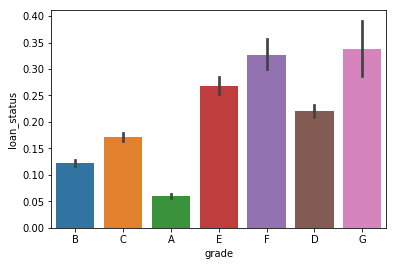

In [22]:
#Plotiing default rates across grade of the loan
sns.barplot(x='grade', y='loan_status', data=Loan)
plt.show()

In [23]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=Loan)
    plt.show()

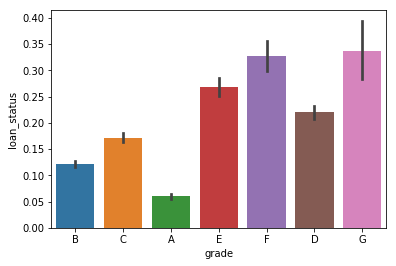

In [24]:
# compare default rates across grade of loan
plot_cat('grade')

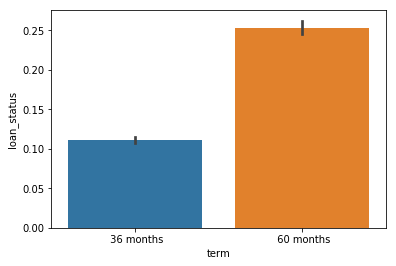

In [25]:
#Loan default of 60 months > 36 months
plot_cat('term')

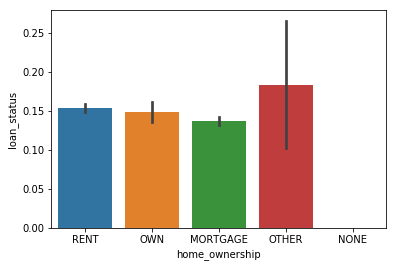

In [26]:
#Slight difference in home ownership default rate
plot_cat('home_ownership')

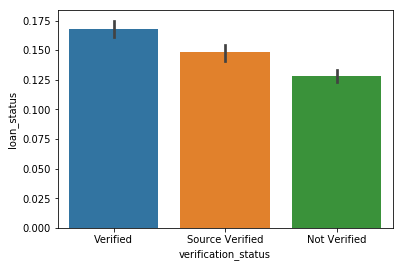

In [27]:
#Veridfied Loans default are more than not verified
plot_cat('verification_status')

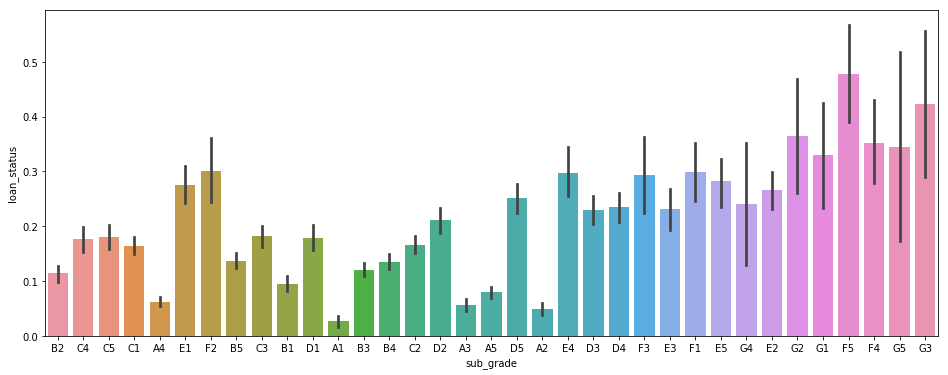

In [28]:
#Here A1 is better than A2 better than A3 and so on that as grade decreases 
plt.figure(figsize=(16,6))
plot_cat('sub_grade')

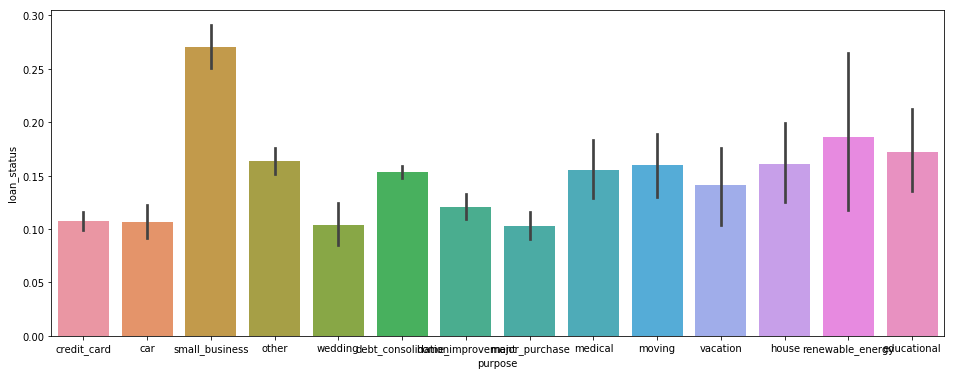

In [29]:
#Small business loans are default are more than the renewable energy and education
plt.figure(figsize=(16,6))
plot_cat('purpose')

In [30]:
#Distribution of loans across years
Loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [31]:
from datetime import datetime
Loan['issue_d'] = Loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [32]:
#Extracting month and year from issue_date
Loan['month'] = Loan['issue_d'].apply(lambda x: x.month)
Loan['year'] = Loan['issue_d'].apply(lambda x: x.year)

In [33]:
#Here the no of loans increase per year
Loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

In [34]:
#No of Loans by months
Loan.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

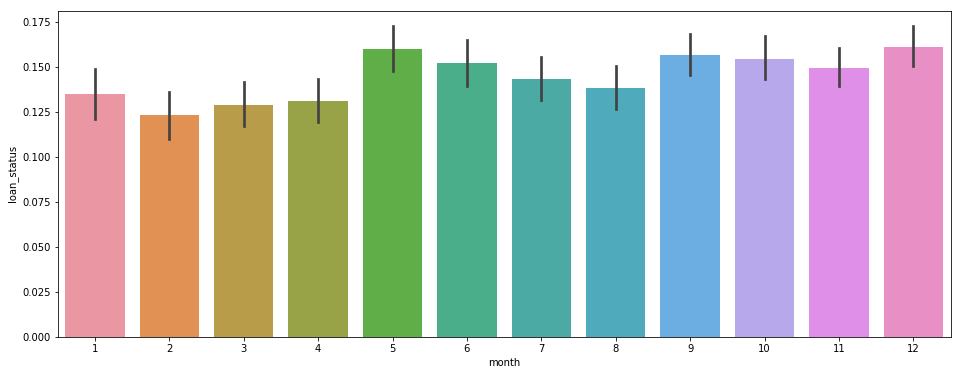

In [35]:
plt.figure(figsize=(16,6))
plot_cat('month')

In [36]:
#No of Loans by years
Loan.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: year, dtype: int64

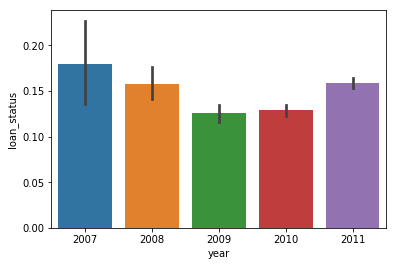

In [37]:
plot_cat('year')

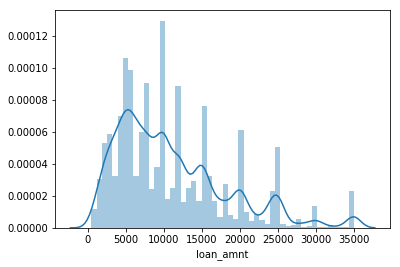

In [38]:
# the median loan amount is around 10,000
sns.distplot(Loan['loan_amnt'])
plt.show()

In [39]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
Loan['loan_amnt'] = Loan['loan_amnt'].apply(lambda x: loan_amount(x))

In [40]:
Loan['loan_amnt'].value_counts()

medium       20675
high          7696
low           7444
very high     2762
Name: loan_amnt, dtype: int64

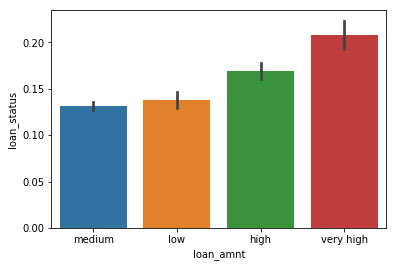

In [41]:
# the default rates across loan amount type
plot_cat('loan_amnt')

In [42]:
Loan['funded_amnt_inv'] = Loan['funded_amnt_inv'].apply(lambda x: loan_amount(x))

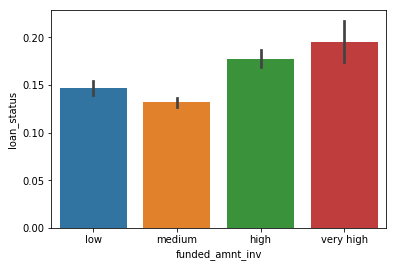

In [43]:
# funded amount
plot_cat('funded_amnt_inv')

In [44]:
# lets also convert interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
Loan['int_rate'] = Loan['int_rate'].apply(lambda x: int_rate(x))

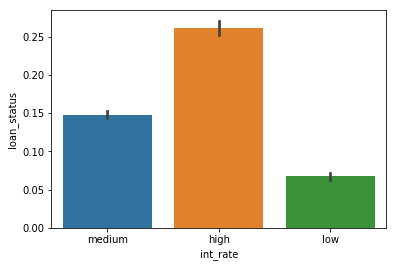

In [45]:
# comparing default rates across rates of interest
plot_cat('int_rate')

In [46]:
# debt to income ratio
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

Loan['dti'] = Loan['dti'].apply(lambda x: dti(x))

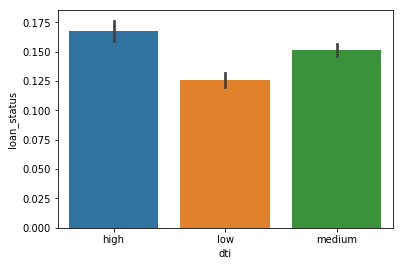

In [47]:
# comparing default rates across debt to income ratio
plot_cat('dti')

In [48]:
# funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
Loan['funded_amnt'] = Loan['funded_amnt'].apply(lambda x: funded_amount(x))

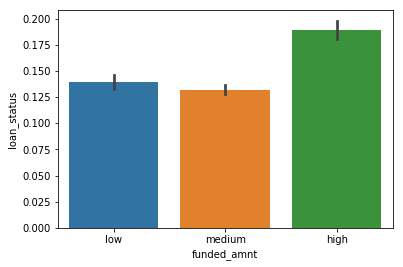

In [49]:
plot_cat('funded_amnt')

In [50]:
# installment
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
Loan['installment'] = Loan['installment'].apply(lambda x: installment(x))

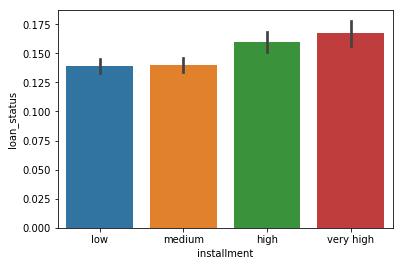

In [51]:
# comparing default rates across installment
plot_cat('installment')

In [52]:
# annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

Loan['annual_inc'] = Loan['annual_inc'].apply(lambda x: annual_income(x))

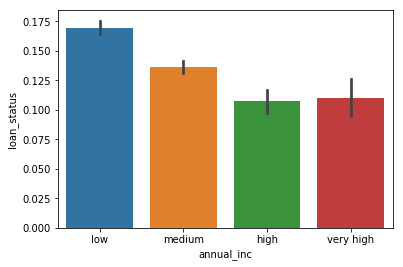

In [53]:
# annual income and default rate
plot_cat('annual_inc')

# SEGMENTED UNIVARIATE ANALYSIS

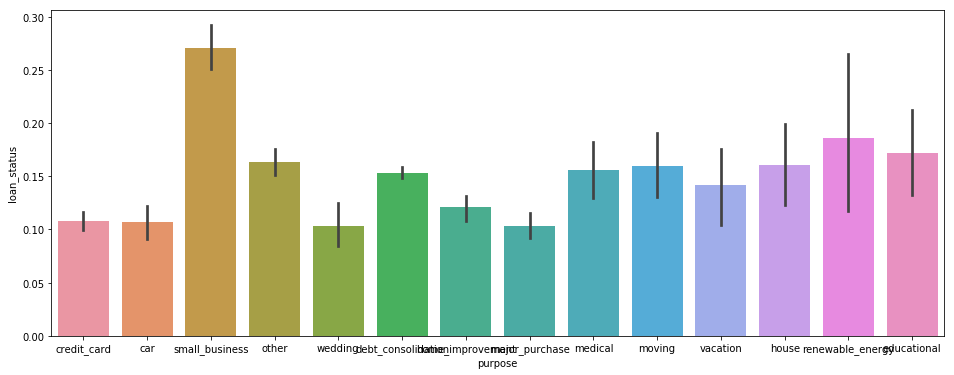

In [54]:
#small business loans defualt the most, then renewable energy and education
plt.figure(figsize=(16, 6))
plot_cat('purpose')

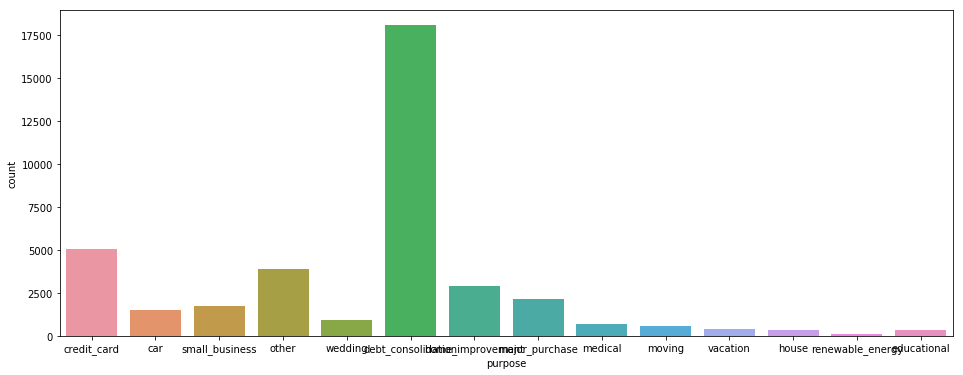

In [55]:
#No of loans by purpose
plt.figure(figsize=(16,6))
sns.countplot(x='purpose', data=Loan)
plt.show()

In [56]:
#Filtering the data frame
Filter = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
Loan = Loan[Loan['purpose'].isin(Filter)]
Loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

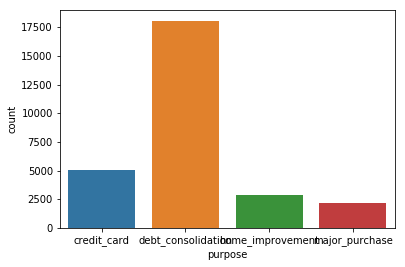

In [57]:
sns.countplot(x=Loan['purpose'])
plt.show()

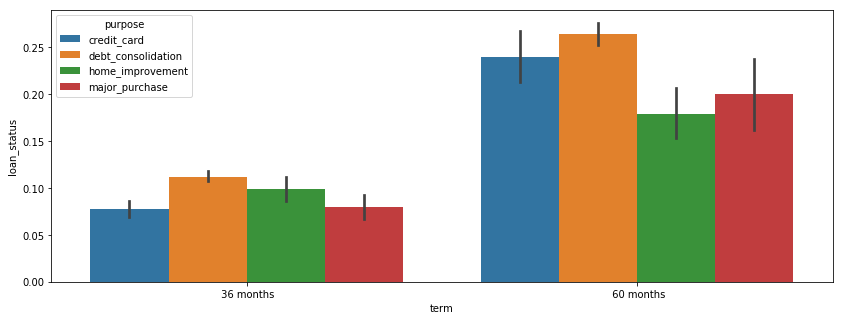

In [58]:
#Compare the default rates of two types of categorical variables
plt.figure(figsize=[14,5])
sns.barplot(x='term', y='loan_status', hue='purpose', data=Loan)
plt.show()

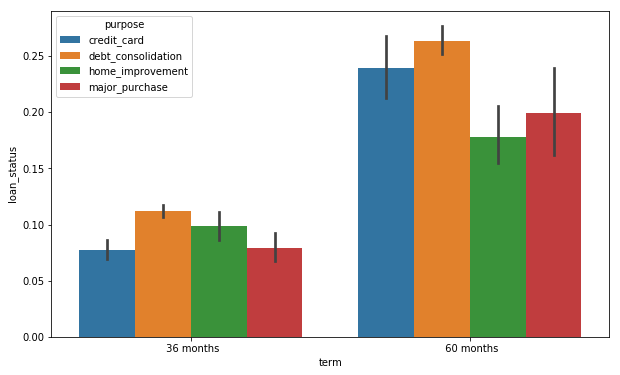

In [59]:
#Function for which takes a categorical variable and plots the default rate
def plot_segmented(cat_var):
    plt.figure(figsize=(10,6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=Loan)
    plt.show()
    
plot_segmented('term')

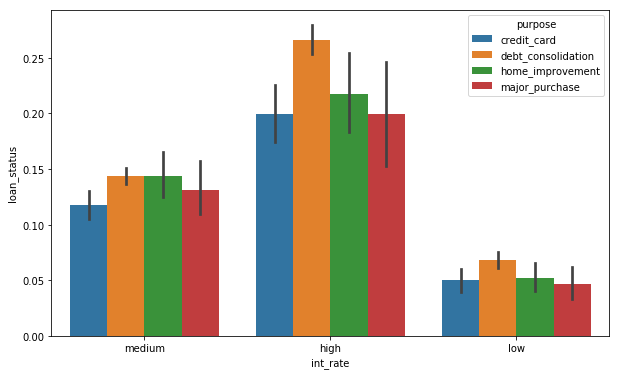

In [61]:
plot_segmented('int_rate')

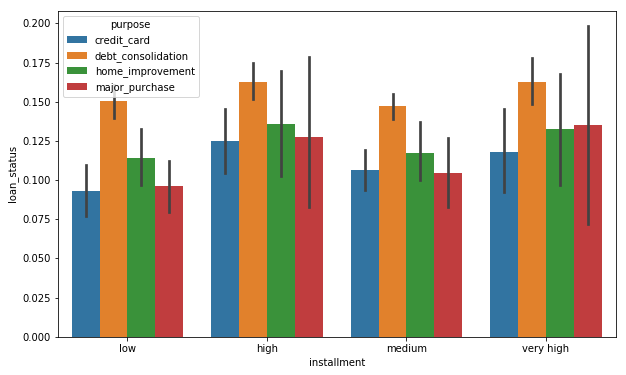

In [62]:
plot_segmented('installment')

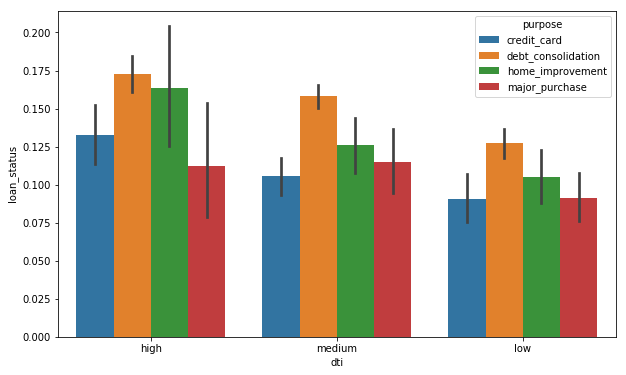

In [63]:

plot_segmented('dti')

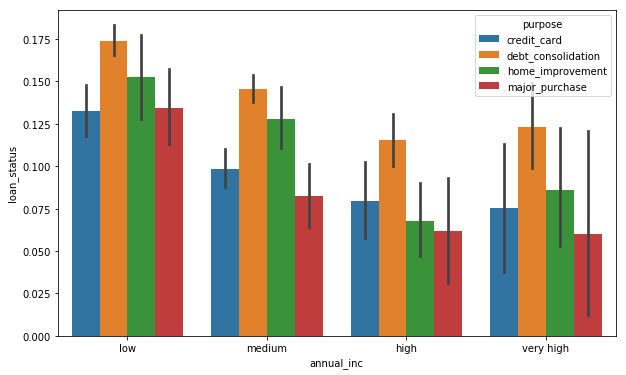

In [64]:
plot_segmented('annual_inc')

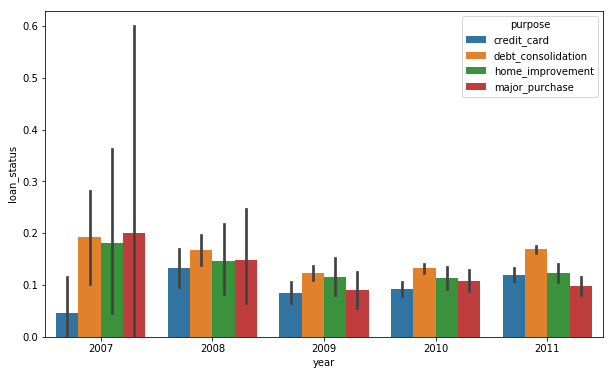

In [66]:
plot_segmented('year')

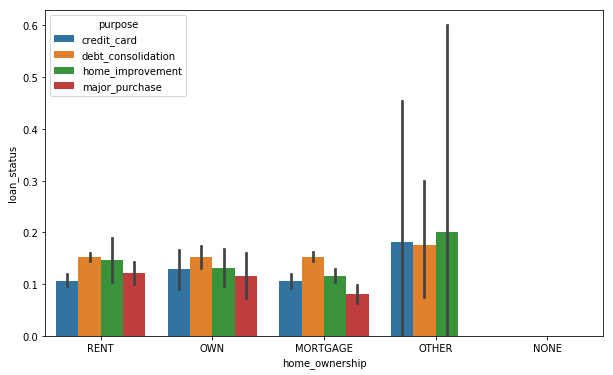

In [67]:
plot_segmented('home_ownership')

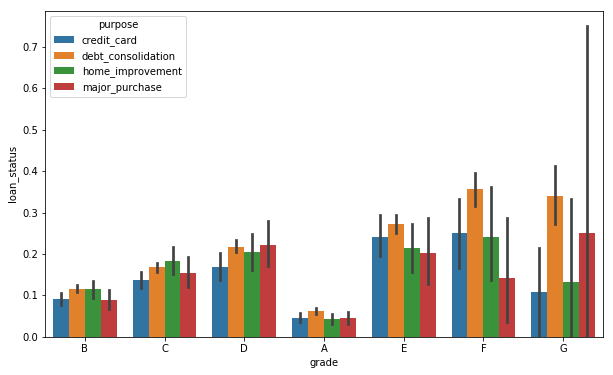

In [68]:
plot_segmented('grade')

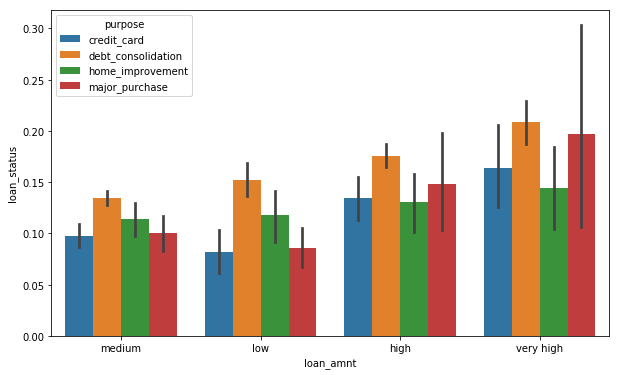

In [69]:
plot_segmented('loan_amnt')

In [70]:
#Variation of default rate across annual_nc
Loan.groupby('annual_inc').loan_status.mean().sort_values(ascending = False)

annual_inc
low          0.161748
medium       0.130881
very high    0.101742
high         0.097032
Name: loan_status, dtype: float64

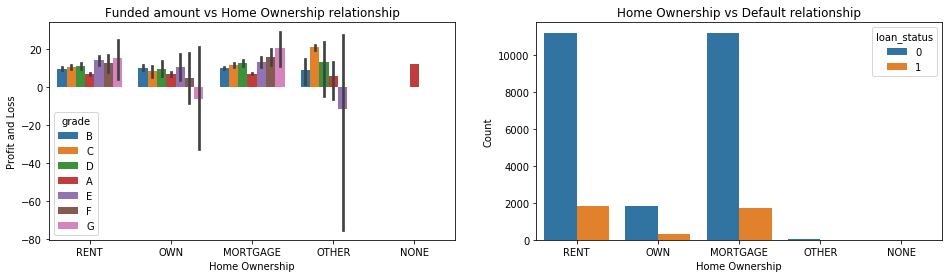

In [75]:
#funded amount vs home ownership and home ownership vs default relationship 
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='Pnl',data=Loan,hue='grade')
plt.xlabel("Home Ownership")
plt.ylabel("Profit and Loss")

plt.title("Funded amount vs Home Ownership relationship")


plt.subplot(1,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=Loan)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Default relationship")
plt.show()

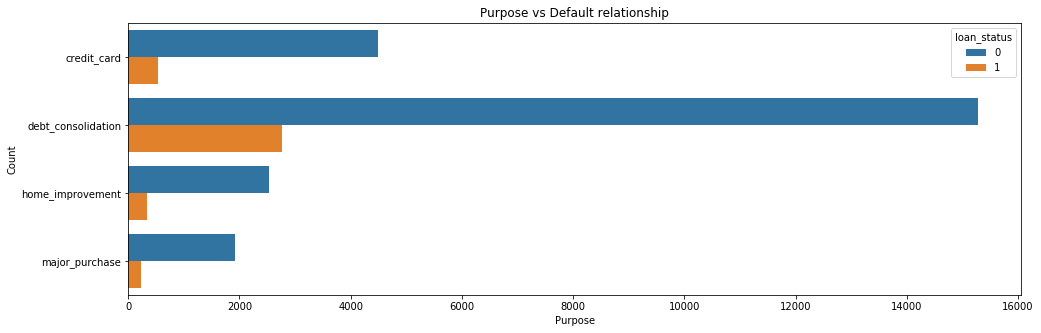

In [79]:
#purpose vs default releation ship
plt.figure(figsize=(16,5))
sns.countplot(y='purpose',hue='loan_status',data=Loan)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

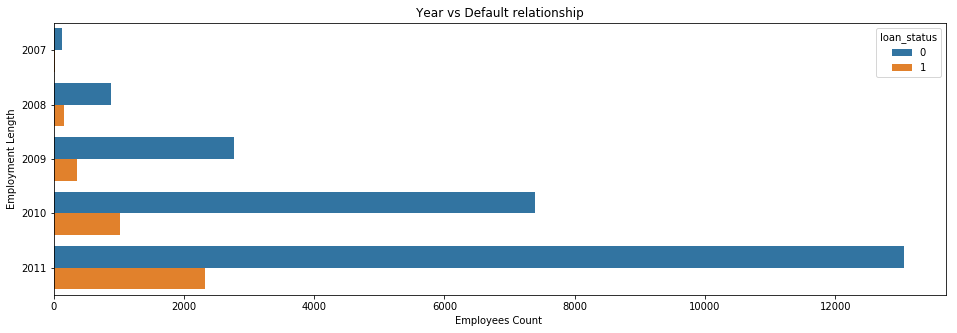

In [84]:
#Year vs default 
plt.figure(figsize=(16,5))
sns.countplot(y='year',hue='loan_status',data=Loan)
plt.xlabel("Employees Count ")
plt.ylabel("Employment Length")
plt.title("Year vs Default relationship")
plt.show()

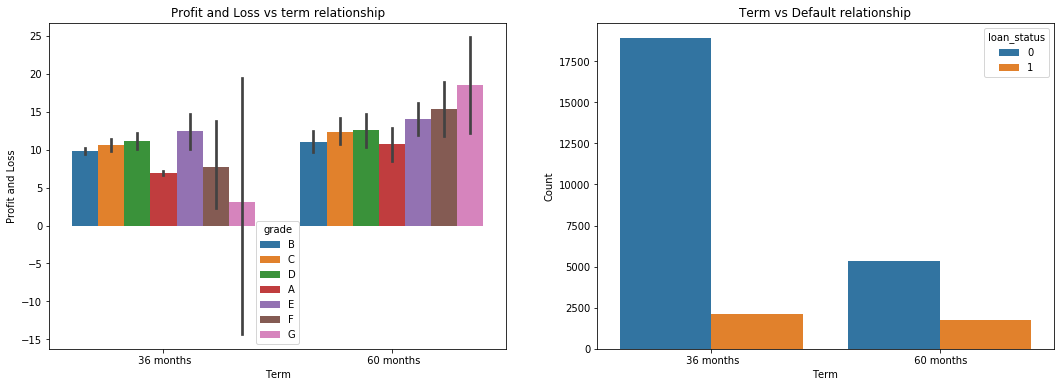

In [88]:
# Relationship of default with term with a barplot
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(x='term',y='Pnl',data=Loan, hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit and Loss")

plt.title("Profit and Loss vs term relationship")


plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=Loan)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Default relationship")
plt.show()

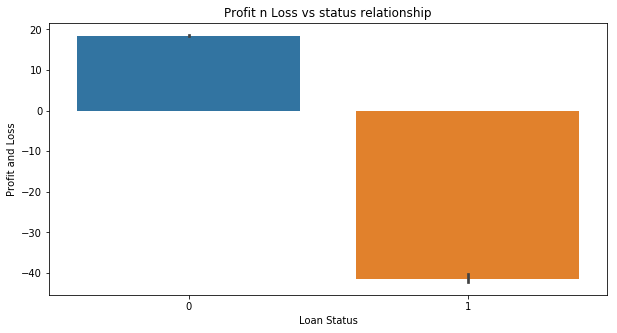

In [94]:
# Relationship of default with funded amount 
plt.figure(figsize=(10,5))

sns.barplot(x='loan_status',y='Pnl',data=Loan)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")
plt.title("Profit n Loss vs status relationship")
plt.show()


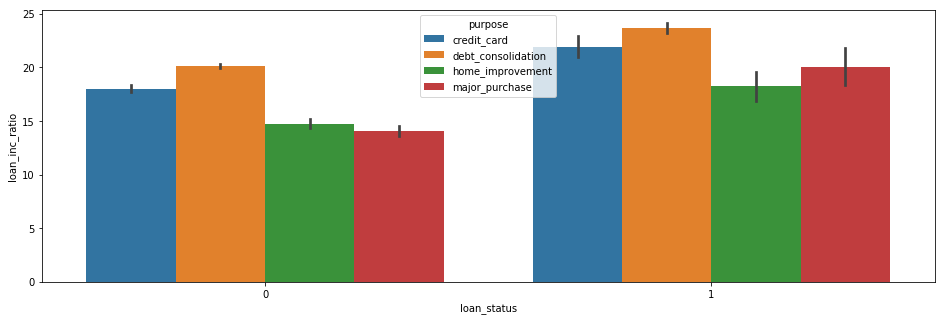

In [96]:
plt.figure(figsize=(16,5))
sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=Loan)
plt.show()